# Multiple Linear Regression

In [11]:
import numpy as np

data = np.loadtxt('economic_data.txt', skiprows=35)
X = data[:, 1:-1]
y = data[:, -1]

X_design = np.column_stack([np.ones(len(X)), X])
beta, residuals, rank, sv = np.linalg.lstsq(X_design, y, rcond=None)

labels = ['beta_0 (intercept)', 'beta_1 (A1)', 'beta_2 (A2)', 'beta_3 (A3)', 'beta_4 (A4)', 'beta_5 (A5)', 'beta_6 (A6)']
for label, coef in zip(labels, beta):
    print(f"{label}: {coef:.6f}")

y_hat = X_design @ beta
residual_norm = np.linalg.norm(y - y_hat)
print("residual norm:", residual_norm)

beta_0 (intercept): -3475440.824135
beta_1 (A1): 14.789485
beta_2 (A2): -0.035748
beta_3 (A3): -2.020195
beta_4 (A4): -1.032766
beta_5 (A5): -0.049119
beta_6 (A6): 1825.543653
residual norm: 912.1098032578232


# Singular Value Decomposition

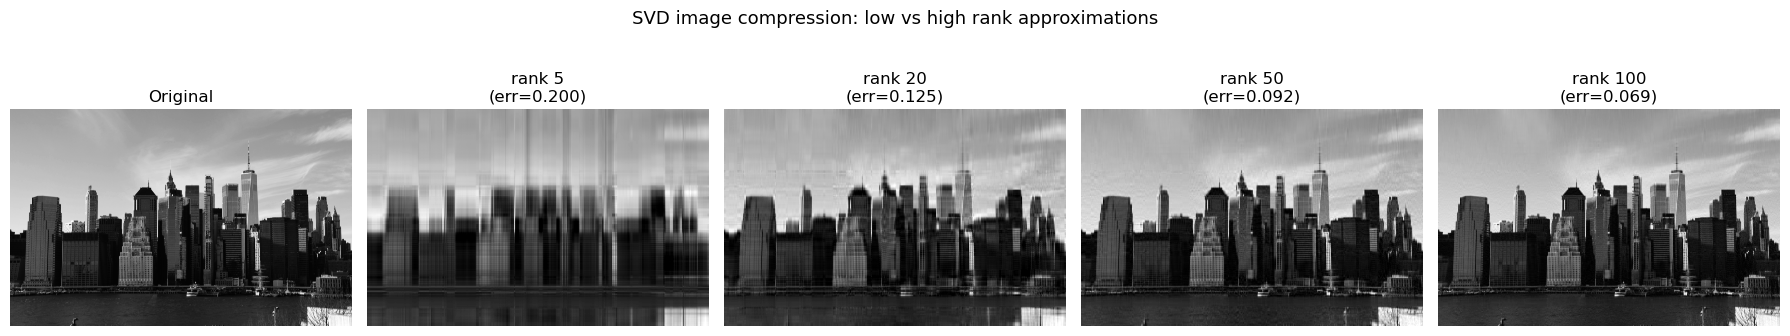

rank    5: 95.98% variance explained
rank   20: 98.44% variance explained
rank   50: 99.15% variance explained
rank  100: 99.52% variance explained


In [21]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

img = np.array(Image.open('IMG_2308.jpeg').convert('L'), dtype=float)

U, S, Vt = np.linalg.svd(img, full_matrices=False)

def low_rank_approx(U, S, Vt, k):
    return U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]

ranks = [5, 20, 50, 100]

fig, axes = plt.subplots(1, len(ranks) + 1, figsize=(18, 4))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

for ax, k in zip(axes[1:], ranks):
    approx = low_rank_approx(U, S, Vt, k)
    approx = np.clip(approx, 0, 255)
    
    err = np.linalg.norm(img - approx, 'fro') / np.linalg.norm(img, 'fro')
    
    ax.imshow(approx, cmap='gray')
    ax.set_title(f'rank {k}\n(err={err:.3f})')
    ax.axis('off')

plt.suptitle('SVD image compression: low vs high rank approximations', fontsize=13)
plt.tight_layout()
plt.show()

total_energy = np.sum(S**2)
for k in ranks:
    energy_k = np.sum(S[:k]**2)
    print(f"rank {k:4d}: {100*energy_k/total_energy:.2f}% variance explained")

In [18]:
print(f"image shape: {img.shape}")
print(f"U shape: {U.shape}, S shape: {S.shape}, V^T shape: {Vt.shape}")
print(f"total singular values: {len(S)}")
print(f"top 10 singular values: {S[:10].round(2)}")

image shape: (3800, 5991)
U shape: (3800, 3800), S shape: (3800,), V^T shape: (3800, 5991)
total singular values: 3800
top 10 singular values: [588377.45 107235.03  76857.83  71675.65  55795.14  45585.02  36927.5
  31317.38  29481.8   26053.55]


In [20]:
ranks = [5, 20, 50, 100]
for k in ranks:
    approx = low_rank_approx(U, S, Vt, k)
    err = np.linalg.norm(img - approx, 'fro') / np.linalg.norm(img, 'fro')
    var_explained = np.sum(S[:k]**2) / np.sum(S**2)
    print(f"rank {k:4d},  relative error: {err:.4f}, variance explained: {100*var_explained:.2f}%")

rank    5,  relative error: 0.2005, variance explained: 95.98%
rank   20,  relative error: 0.1250, variance explained: 98.44%
rank   50,  relative error: 0.0921, variance explained: 99.15%
rank  100,  relative error: 0.0695, variance explained: 99.52%
